1.Scrape text data from some selected articles from above link. You can use beautiful soup, newspaper or any data scraping libraries.

In [232]:
###conda install BeautifulSoup4
###conda install lxml
###conda install requests
##conda install neo4j
#conda install spacy 
##conda install py2neo

In [233]:
from bs4 import BeautifulSoup
import pandas as pd
import requests,sys
from urllib.request import Request, urlopen
import spacy
#nlp=spacy.load('en_core_web_sm')
import networkx as nx
import matplotlib.pyplot as plt
from spacy.lang.en import English
nlp_model = spacy.load('en_core_web_sm')

In [234]:
url = 'https://thehimalayantimes.com/kathmandu/issuance-of-new-driving-licences-uncertain/'
req = Request(url , headers={'User-Agent': 'Mozilla/5.0'})
source = urlopen(req).read()
soup=BeautifulSoup(source,'lxml')
heading=soup.find("h2")      #getting the headline of the news article
#print(heading.text)
headin=heading.text
paragraph = soup.find('div',class_='postDetail mainPost')     #getting body paragraph from the article
para=[data.get_text() for data in paragraph.find_all("p")]
print(headin)
print(para)

Issuance of new driving licences uncertain
['KATHMANDU, NOVEMBER 20', 'The Department of Transport Management, which had stated that it would start issuing new driving licences after the festive season, has not even started preparations to do so and there is no sign of resumption of the service in near future.', 'The image shows the specimen of smart driving licence of Nepal, in Kathmandu, on September 26, 2017. Photo: Suresh Chaudhary/THT', 'Not only that, the department now claims that the responsibility to issue licences has been handed over to provincial governments and they need to look into the issue.', '“Earlier, we had said that the issuance of new driving licences was likely to resume post-festive season after taking into consideration the COVID pandemic.', '“However, the pandemic is not going to be over anytime soon,” said Gogan Bahadur Hamal, director general of DoTM.', 'He said since the department had been facing problems in handling the crowd while renewing and distributi

2.Process text for sentences and apply necesssray NLP processings. You can use nltk,
spacy or any NLP libraries.


In [235]:
#preprocessing the scraped datas and writing it under one document
head=nlp_model(heading.text)
headd=headin+"."    # headings generally dont have a terminal so when indv sentences are taken they are concatinated to the next string to act as 1 sentence
print(headin)
print(headd)
a=[headd]
for i in para[1:-1]:  #excluding date paragraph and last paragraphs 
    a.append(i)
print(a)
full_text="\n".join(a)
print(full_text)

Issuance of new driving licences uncertain
Issuance of new driving licences uncertain.
['Issuance of new driving licences uncertain.', 'The Department of Transport Management, which had stated that it would start issuing new driving licences after the festive season, has not even started preparations to do so and there is no sign of resumption of the service in near future.', 'The image shows the specimen of smart driving licence of Nepal, in Kathmandu, on September 26, 2017. Photo: Suresh Chaudhary/THT', 'Not only that, the department now claims that the responsibility to issue licences has been handed over to provincial governments and they need to look into the issue.', '“Earlier, we had said that the issuance of new driving licences was likely to resume post-festive season after taking into consideration the COVID pandemic.', '“However, the pandemic is not going to be over anytime soon,” said Gogan Bahadur Hamal, director general of DoTM.', 'He said since the department had been fa

In [236]:
#getting sentences
def getSentences(text):
    nlp = English()
    nlp.add_pipe(nlp.create_pipe('sentencizer'))
    document = nlp(text)
    return [sent.string.strip() for sent in document.sents]
text = full_text
sentences = getSentences(text)
print(sentences)
print(len(sentences))



['Issuance of new driving licences uncertain.', 'The Department of Transport Management, which had stated that it would start issuing new driving licences after the festive season, has not even started preparations to do so and there is no sign of resumption of the service in near future.', 'The image shows the specimen of smart driving licence of Nepal, in Kathmandu, on September 26, 2017.', 'Photo: Suresh Chaudhary/THT\nNot only that, the department now claims that the responsibility to issue licences has been handed over to provincial governments and they need to look into the issue.', '“Earlier, we had said that the issuance of new driving licences was likely to resume post-festive season after taking into consideration the COVID pandemic.', '“However, the pandemic is not going to be over anytime soon,” said Gogan Bahadur Hamal, director general of DoTM.', 'He said since the department had been facing problems in handling the crowd while renewing and distributing licences, it would

In [237]:
#getting token, pos and lemma of each sentence
def tokenizeSentences(sentence):
    tokens = nlp_model(sentence)
    for token in tokens:
        print(token.text,"------->",token.pos_,"------->",token.lemma_)
sentences = getSentences(text)

for index,sentence in enumerate(sentences):
    print(f"for sentence {index}")
    print("Text""------->","POS","------->","lemma",)
    tokenizeSentences(sentence)
    print("\n")

for sentence 0
Text-------> POS -------> lemma
Issuance -------> NOUN -------> issuance
of -------> ADP -------> of
new -------> ADJ -------> new
driving -------> NOUN -------> driving
licences -------> NOUN -------> licence
uncertain -------> ADJ -------> uncertain
. -------> PUNCT -------> .


for sentence 1
Text-------> POS -------> lemma
The -------> DET -------> the
Department -------> PROPN -------> Department
of -------> ADP -------> of
Transport -------> PROPN -------> Transport
Management -------> PROPN -------> Management
, -------> PUNCT -------> ,
which -------> DET -------> which
had -------> AUX -------> have
stated -------> VERB -------> state
that -------> SCONJ -------> that
it -------> PRON -------> -PRON-
would -------> VERB -------> would
start -------> VERB -------> start
issuing -------> VERB -------> issue
new -------> ADJ -------> new
driving -------> NOUN -------> driving
licences -------> NOUN -------> licence
after -------> ADP -------> after
the -------> DET

Before -------> ADP -------> before
the -------> DET -------> the
service -------> NOUN -------> service
was -------> AUX -------> be
halted -------> VERB -------> halt
, -------> PUNCT -------> ,
the -------> DET -------> the
department -------> NOUN -------> department
was -------> AUX -------> be
issuing -------> VERB -------> issue
around -------> ADP -------> around
3,500 -------> NUM -------> 3,500
to -------> ADP -------> to
4,000 -------> NUM -------> 4,000
forms -------> NOUN -------> form
per -------> ADP -------> per
day -------> NOUN -------> day
to -------> ADP -------> to
licence -------> NOUN -------> licence
- -------> PUNCT -------> -
seekers -------> NOUN -------> seeker
. -------> PUNCT -------> .


for sentence 14
Text-------> POS -------> lemma
Once -------> SCONJ -------> once
the -------> DET -------> the
licence -------> NOUN -------> licence
issuance -------> NOUN -------> issuance
process -------> NOUN -------> process
resumes -------> VERB -------> resume
, -

In [238]:
#getting entity and entity label of each sentence
def EntitySentences(sentence):
    tokens = nlp_model(sentence)
    for entity in tokens.ents:
        print(entity.text,"------->",entity.label_)

        
        
sentences = getSentences(text)
for index,sentence in enumerate(sentences):
    print(f"for sentence {index}")
    print("entity""------->","entity label",)
    EntitySentences(sentence)
    print("\n")

for sentence 0
entity-------> entity label


for sentence 1
entity-------> entity label
The Department of Transport Management -------> ORG


for sentence 2
entity-------> entity label
Nepal -------> GPE
Kathmandu -------> GPE
September 26, 2017 -------> DATE


for sentence 3
entity-------> entity label
Suresh Chaudhary/THT -------> PERSON


for sentence 4
entity-------> entity label
post-festive season -------> DATE
COVID -------> ORG


for sentence 5
entity-------> entity label
Gogan Bahadur Hamal -------> PERSON
DoTM -------> ORG


for sentence 6
entity-------> entity label


for sentence 7
entity-------> entity label
Hamal -------> PERSON


for sentence 8
entity-------> entity label


for sentence 9
entity-------> entity label


for sentence 10
entity-------> entity label
Hamal -------> ORG


for sentence 11
entity-------> entity label
Kathmandu valley -------> LOC


for sentence 12
entity-------> entity label


for sentence 13
entity-------> entity label
around 3,500 to 4,000 ----

3.Extract the subject, object and relationship from each sentences. Extracting entities with
modifiers is a plus point.


In [239]:
#determine all subjects and objects in the document(we use dep)]
doca=nlp_model(full_text)
for token in doca:
    # extract subject
    if (token.dep_=='nsubj'):
        print(token.text,'-->',token.dep_)
    # extract object
    elif (token.dep_=='dobj'):
        print(token.text,'-->',token.dep_)

Issuance --> nsubj
Department --> nsubj
which --> nsubj
it --> nsubj
licences --> dobj
preparations --> dobj
image --> nsubj
specimen --> dobj
department --> nsubj
licences --> dobj
they --> nsubj
we --> nsubj
issuance --> nsubj
season --> dobj
pandemic --> dobj
pandemic --> nsubj
Hamal --> nsubj
He --> nsubj
department --> nsubj
problems --> dobj
crowd --> dobj
licences --> dobj
it --> nsubj
licences --> dobj
season --> nsubj
we --> nsubj
meetings --> dobj
Hamal --> nsubj
department --> nsubj
it --> nsubj
licences --> dobj
system --> dobj
Hamal --> nsubj
they --> nsubj
discussions --> dobj
department --> nsubj
step --> dobj
process --> dobj
licences --> dobj
situation --> nsubj
infection --> nsubj
we --> nsubj
government --> dobj
protocol --> dobj
we --> nsubj
process --> dobj
licences --> dobj
he --> nsubj
department --> nsubj
forms --> dobj
process --> nsubj
seekers --> nsubj
licence --> dobj
trial --> dobj
applicant --> nsubj
trial --> dobj
licence --> dobj


In [240]:
#determine subject,object and their relationship
# we can also use Stanford-OpenIE Python Module to determine the triples

def printToken(token):  # gives syntactic dependencies of tokens(nsubj,root)
    print(token.text, "->", token.dep_)

def appendChunk(original, chunk): # gives relationship between subject and object
    return original + ' ' + chunk

def isRelationCandidate(token):  #dependency tags for relationship:returns true/false,,check garne
    deps = ["ROOT", "adj", "attr", "agent", "amod"]
    return any(subs in token.dep_ for subs in deps)

def isConstructionCandidate(token): #dependency tags for entitiess: returns true/false..check garne
    deps = ["compound", "prep", "conj", "mod"]
    return any(subs in token.dep_ for subs in deps)
def processSubjectObjectPairs(sentences):   #deterine subject object reationshipof  a sentence  
    subject =''                             #basically taking every token and putting it in a category
    object = ''                             #we first perform word lemmatization(relationship ko) before putting into a category
    relation = ''
    subjectConstruction = ''
    objectConstruction = ''
    #print("subject","----------->","relationship","---------------->","object")
    for token in sentences:
        #printToken(token)
        if "punct" in token.dep_:    #skipped
            continue
        if isRelationCandidate(token):    # for dep !=subj but taken along subj
            relation = appendChunk(relation, token.lemma_)
        if isConstructionCandidate(token):  #for dep !=obj but taken along obj
            if subjectConstruction:
                subjectConstruction = appendChunk(subjectConstruction, token.text)
            if objectConstruction:
                objectConstruction = appendChunk(objectConstruction, token.text)
        if "subj" in token.dep_:    #for dep=subj
            subject = appendChunk(subject, token.text)
            subject = appendChunk(subjectConstruction, subject)
            subjectConstruction = ''
        if "obj" in token.dep_:     #for dep = obj
            object = appendChunk(object, token.text)
            object = appendChunk(objectConstruction, object)
            objectConstruction = ''
    #print("subject","relationship","object")
    print (f"{subject.strip():{20}}{relation.strip():{20}}{object.strip():{20}}")
    return (subject.strip(), relation.strip(), object.strip())

def processSentence(sentence):
    tokens = nlp_model(sentence)
    return processSubjectObjectPairs(tokens)


In [241]:
#mainbody for subj, relation, obj classification
text = full_text
#nlp_model = spacy.load('en_core_web_sm')
#doc=nlp(full_text)
sentences = getSentences(text)
triples = []
#print (text)
for sentence in sentences:
    p=processSentence(sentence)
    triples.append(p)
print("\n")
print(len(triples))
print(triples)

Issuance            new uncertain       licences            
Department which it new festive start signManagement licences season preparations resumption service future
image               show smart drive    specimen licence Nepal Kathmandu September
department responsibility theyphoto THT claim provinciallicences governments issue
we issuance         say new festive     licences season consideration pandemic
pandemic Hamal      say                 DoTM                
He department it    say new             problems crowd licences licences future
season we Hamal     festive provincial saymeetings governments issue
department it       state new           licences system     
                    be progress         front               
Hamal they departmenttake concrete new   discussions step process licences
situation infection spread              valley              
we we he            new add             scenario government protocol process licences
service department  issue       

5.Build a directed graph from the above data with entities as a node and relationships as
an edge. Label each node and edge with corresponding texts. You can use nexworkx,
arongodb, neo4j or any graph/network library.


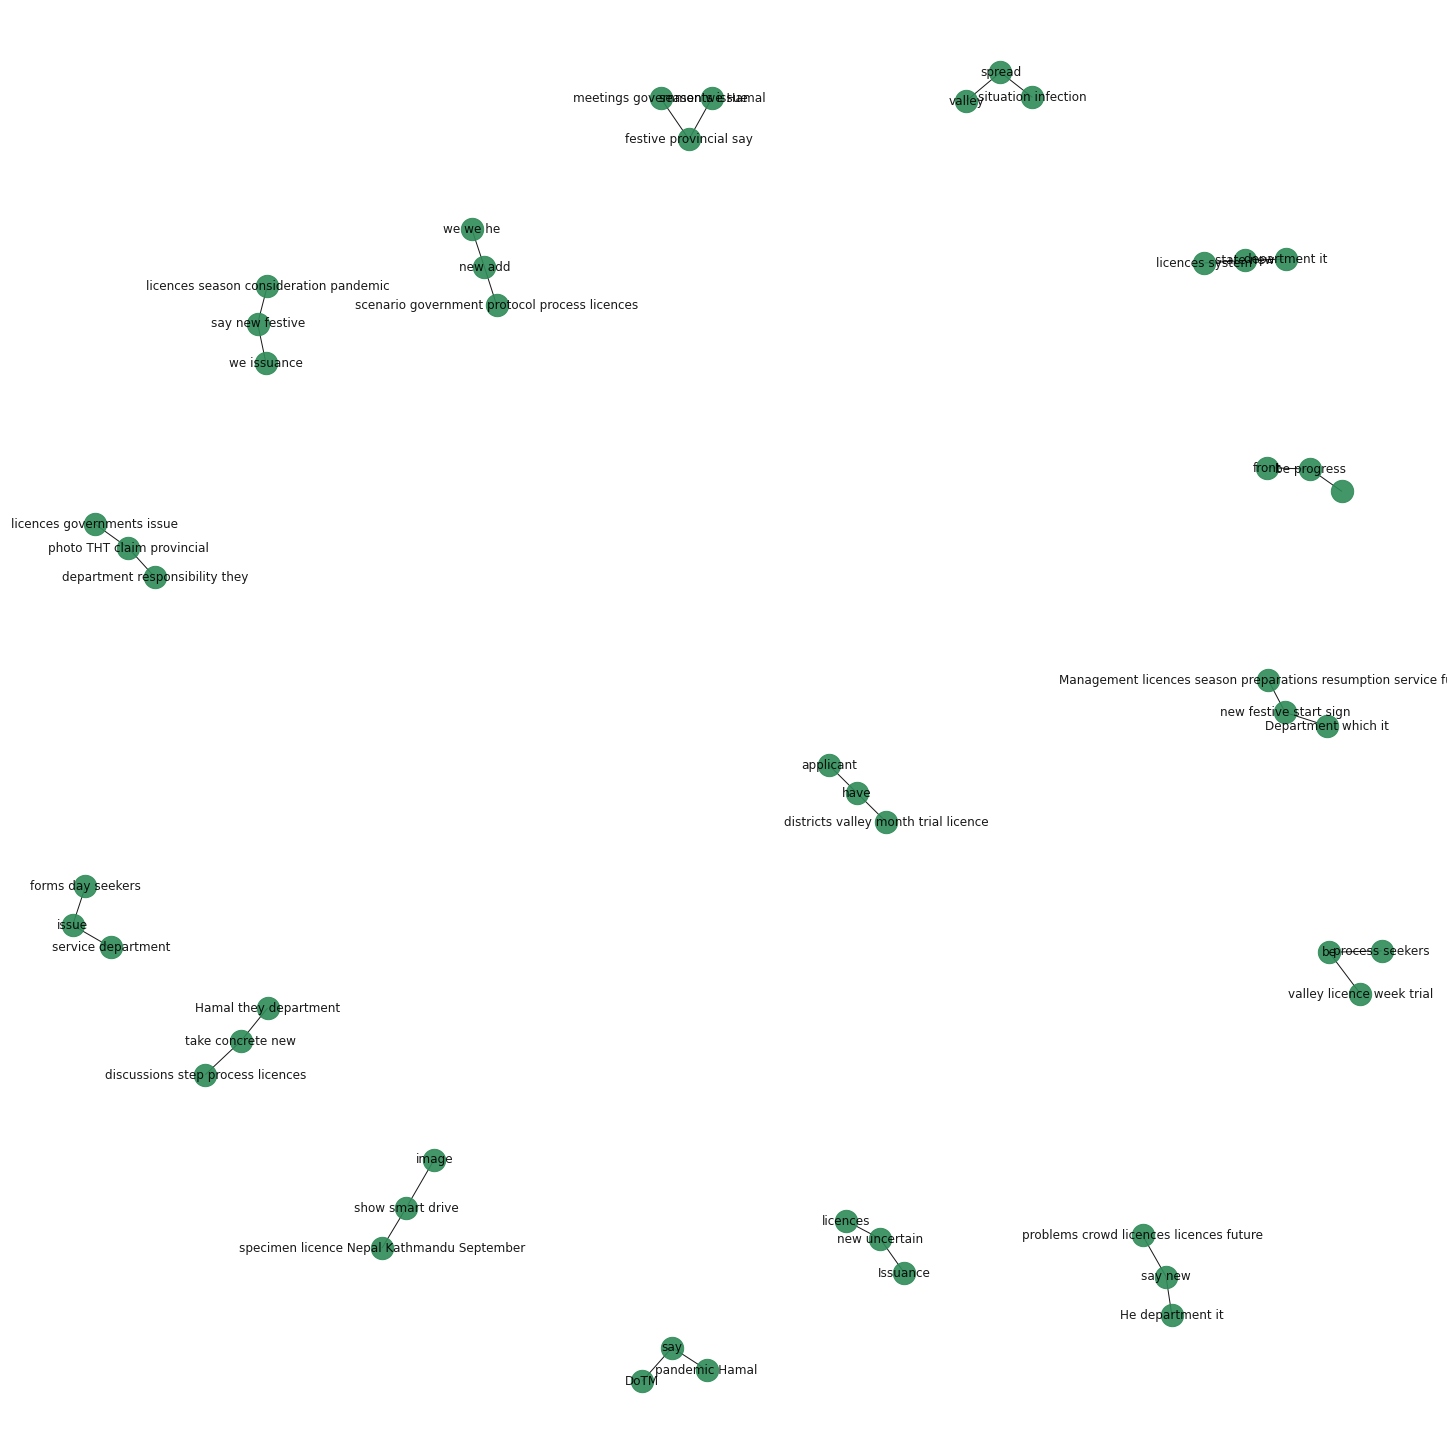

In [246]:
#building Knowlegde graph via nexworkx but plotting into jupyter itself
def printGraph(triples):
    G = nx.Graph()
    for triple in triples:
        G.add_node(triple[0])
        G.add_node(triple[1])
        G.add_node(triple[2])
        G.add_edge(triple[0], triple[1])
        G.add_edge(triple[1], triple[2])

    pos = nx.spring_layout(G)
    plt.figure(figsize=(20,20))
    nx.draw(G, pos, edge_color='black', width=1, linewidths=1,
            node_size=500, node_color='seagreen', alpha=0.9,
            labels={node: node for node in G.nodes()})
    plt.axis('off')
    plt.show()
printGraph(triples)

5. Save the graph db.
6. Get an answer to the given question. Question sentence should be in natural language,
follow the necessary steps to get the answer from the graph db.

In [243]:
#Saving knowledge graph to neo4j db and applying necessary Cypher queries
#print(triples[0][0])
from py2neo import Graph,Node,Relationship
graph=Graph("bolt://localhost:7687",auth=("neo4j","abc"))
for row in triples:
    tx=graph.begin()
    a=Node('Subject',name=row[0])
    tx.create(a)
    b=Node('Object',name=row[2])
   # tx.create(b)
    ab=Relationship(a,row[1],b)
    tx.create(ab)
    tx.commit()
#open neo4j database

# to querry over the knowledge graph using cypher
# to return knowlegraph
 MATCH (s:Subject)-[r]->(o:Object) RETURN s,o
# to return object when subject is asked irrespective to relationship
 MATCH (s:Subject {name:"subject_name"})-[r]->(o:Object) RETURN s,o
# to return object when subject and relationship is given
  MATCH (s:Subject {name:"subject_name"})-[r:"relation_name"]->(o:Object) RETURN s,o
  